In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: >

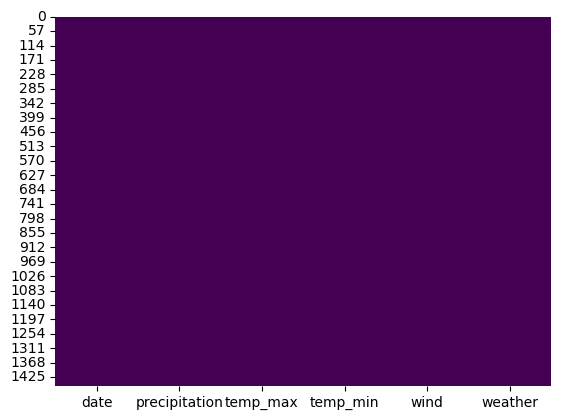

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [7]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['weather']=le.fit_transform(df['weather'])

In [11]:
df['weather']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [14]:
day=[]
month=[]
year=[]
for i in df['date']:
    temp=i.split('-')
    year.append(temp[0])
    month.append(temp[1])
    day.append(temp[2])
    
    

In [19]:
df['day']=day
df['month']=month
df['year']=year

In [23]:
df.drop('date',axis=1,inplace=True)

In [24]:
df

,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,0.0,12.8,5.0,4.7,0,01,01,2012
1,10.9,10.6,2.8,4.5,2,02,01,2012
2,0.8,11.7,7.2,2.3,2,03,01,2012
3,20.3,12.2,5.6,4.7,2,04,01,2012
4,1.3,8.9,2.8,6.1,2,05,01,2012
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,27,12,2015
1457,1.5,5.0,1.7,1.3,2,28,12,2015
1458,0.0,7.2,0.6,2.6,1,29,12,2015
1459,0.0,5.6,-1.0,3.4,4,30,12,2015


In [31]:
X=df.drop('weather',axis=1)
y=df['weather']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=0.3)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
predictions=rf.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [39]:
cf=confusion_matrix(y_test,predictions)


In [40]:
accuracy=accuracy_score(y_test,predictions)
print(accuracy*100)

86.10478359908885
